In [ ]:
!pip install opencv-contrib-python==3.4.2.17

### **IMPORT LIBRARY NEEDED**

In [ ]:
# importing openCV library
import cv2
from google.colab.patches import cv2_imshow

### **function to read the images**

In [ ]:
def read_image(path1,path2):
  # reading the images from their using imread() function
    read_img1 = cv2.imread(path1)
    read_img2 = cv2.imread(path2)
    return (read_img1,read_img2)

### **function to convert images from RGB to gray scale**

In [ ]:
def convert_to_grayscale(pic1,pic2):
    gray_img1 = cv2.cvtColor(pic1,cv2.COLOR_BGR2GRAY)
    gray_img2 = cv2.cvtColor(pic2,cv2.COLOR_BGR2GRAY)
    return (gray_img1,gray_img2)

### **Read Image and Stored in Variable**

In [ ]:
first_image_path = 'Object.jpg'
second_image_path = '5.jpg'

In [ ]:
# reading the image from there path by calling the function
img1, img2 = read_image(first_image_path,second_image_path)

### **converting the readed images into the gray scale images by calling the function**

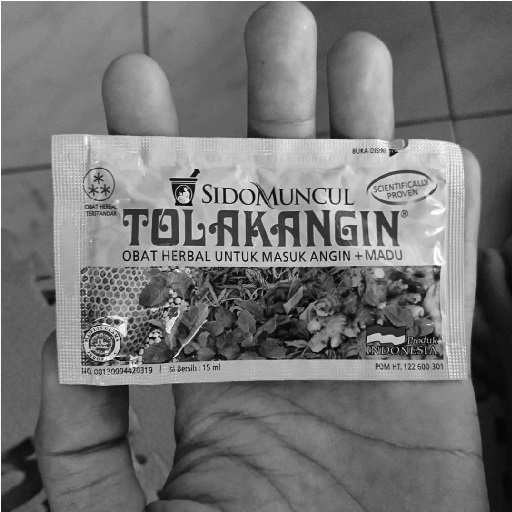

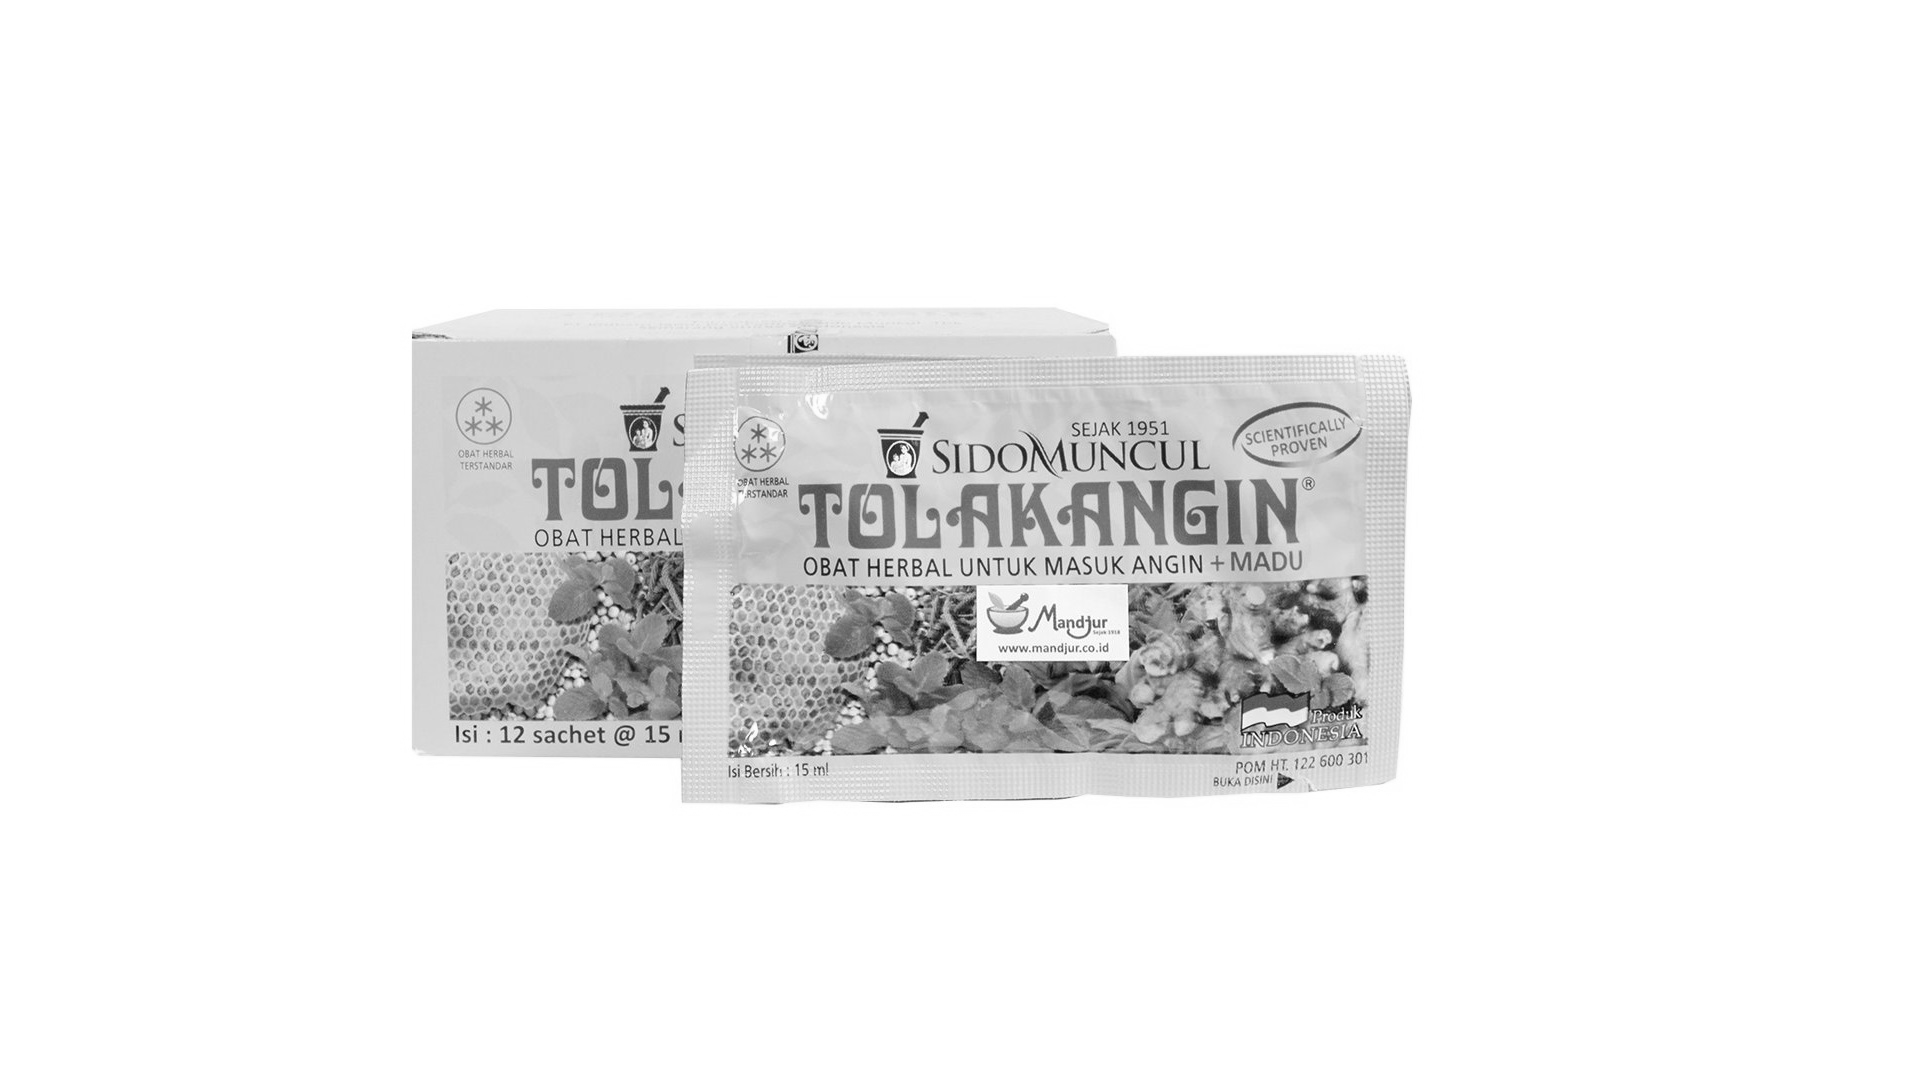

In [ ]:
gray_pic1, gray_pic2 = convert_to_grayscale(img1,img2)
cv2_imshow(gray_pic1)
cv2_imshow(gray_pic2)

### **function to detect the features by finding key points and descriptors from the image**

In [ ]:
def detector(image1,image2):
    # creating ORB detector
    detect = cv2.ORB_create()
 
    # finding key points and descriptors of both images using detectAndCompute() function
    key_point1,descrip1 = detect.detectAndCompute(image1,None)
    key_point2,descrip2 = detect.detectAndCompute(image2,None)
    return (key_point1,descrip1,key_point2,descrip2)

In [ ]:
# storing the finded key points and descriptors of both of the images
key_pt1,descrip1,key_pt2,descrip2 = detector(gray_pic1,gray_pic2)

### **showing the images with their key points finded by the detector**

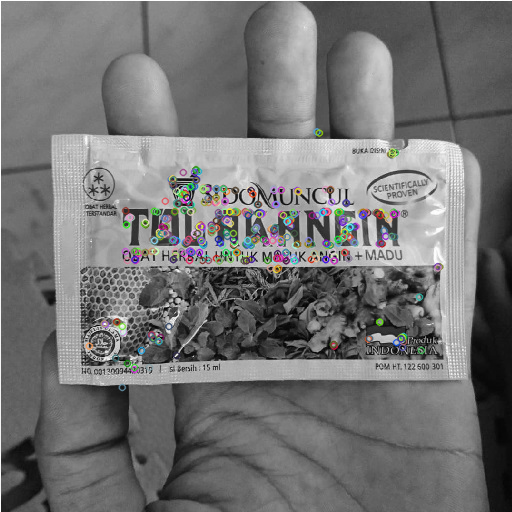

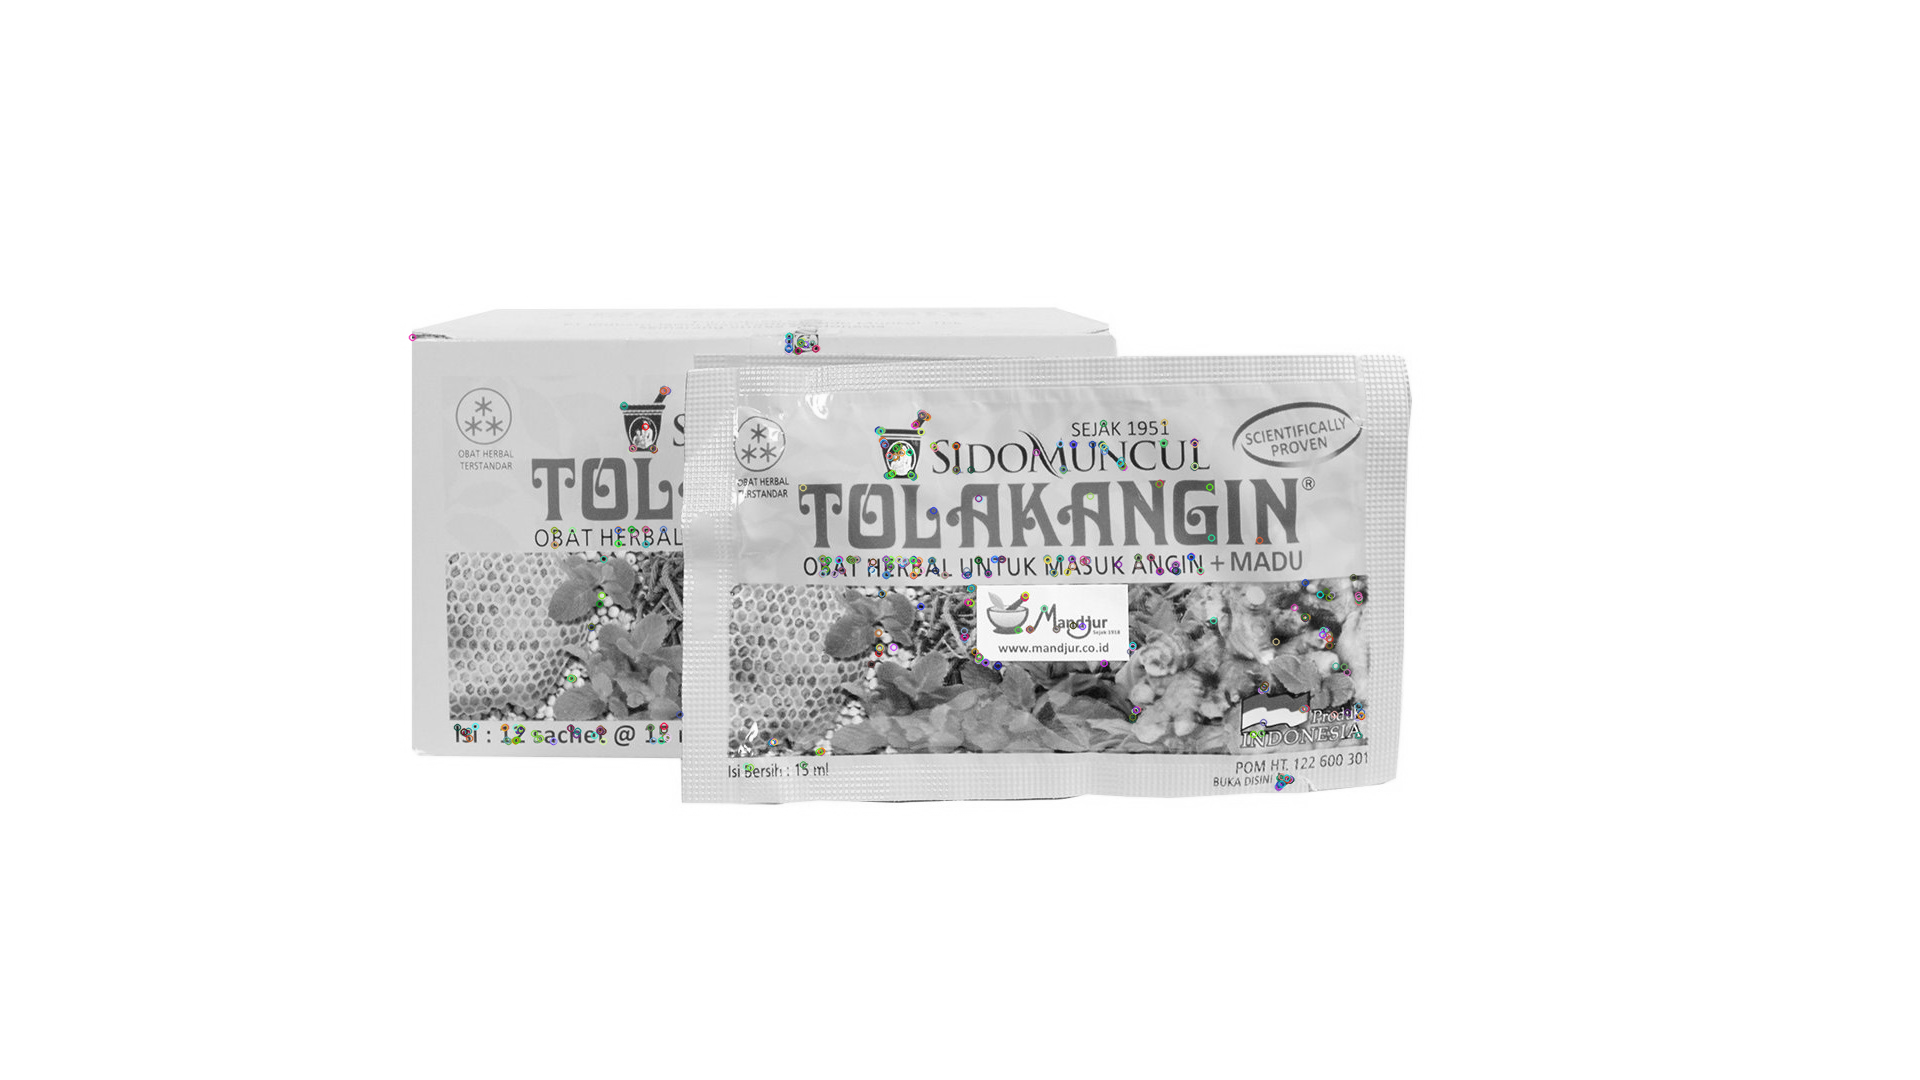

In [ ]:
cv2_imshow(cv2.drawKeypoints(gray_pic1,key_pt1,None))
cv2_imshow(cv2.drawKeypoints(gray_pic2,key_pt2,None))

### **function to find best detected features using brute force**
### **matcher and match them according to there humming distance**

In [16]:
def BF_FeatureMatcher(des1,des2):
    brute_force = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
    no_of_matches = brute_force.match(des1,des2)
 
    # finding the humming distance of the matches and sorting them
    no_of_matches = sorted(no_of_matches,key=lambda x:x.distance)
    return no_of_matches

### **function displaying the output image with the feature matching**

In [18]:
def display_output(pic1,kpt1,pic2,kpt2,best_match):
 
    # drawing the feature matches using drawMatches() function
    output_image = cv2.drawMatches(pic1,kpt1,pic2,kpt2,best_match,None,flags=2)
    cv2_imshow(output_image)

In [19]:
# sorting the number of best matches obtained from brute force matcher
number_of_matches = BF_FeatureMatcher(descrip1,descrip2)
tot_feature_matches = len(number_of_matches)

### **Print Result**

Total Number of Features matches found are 256


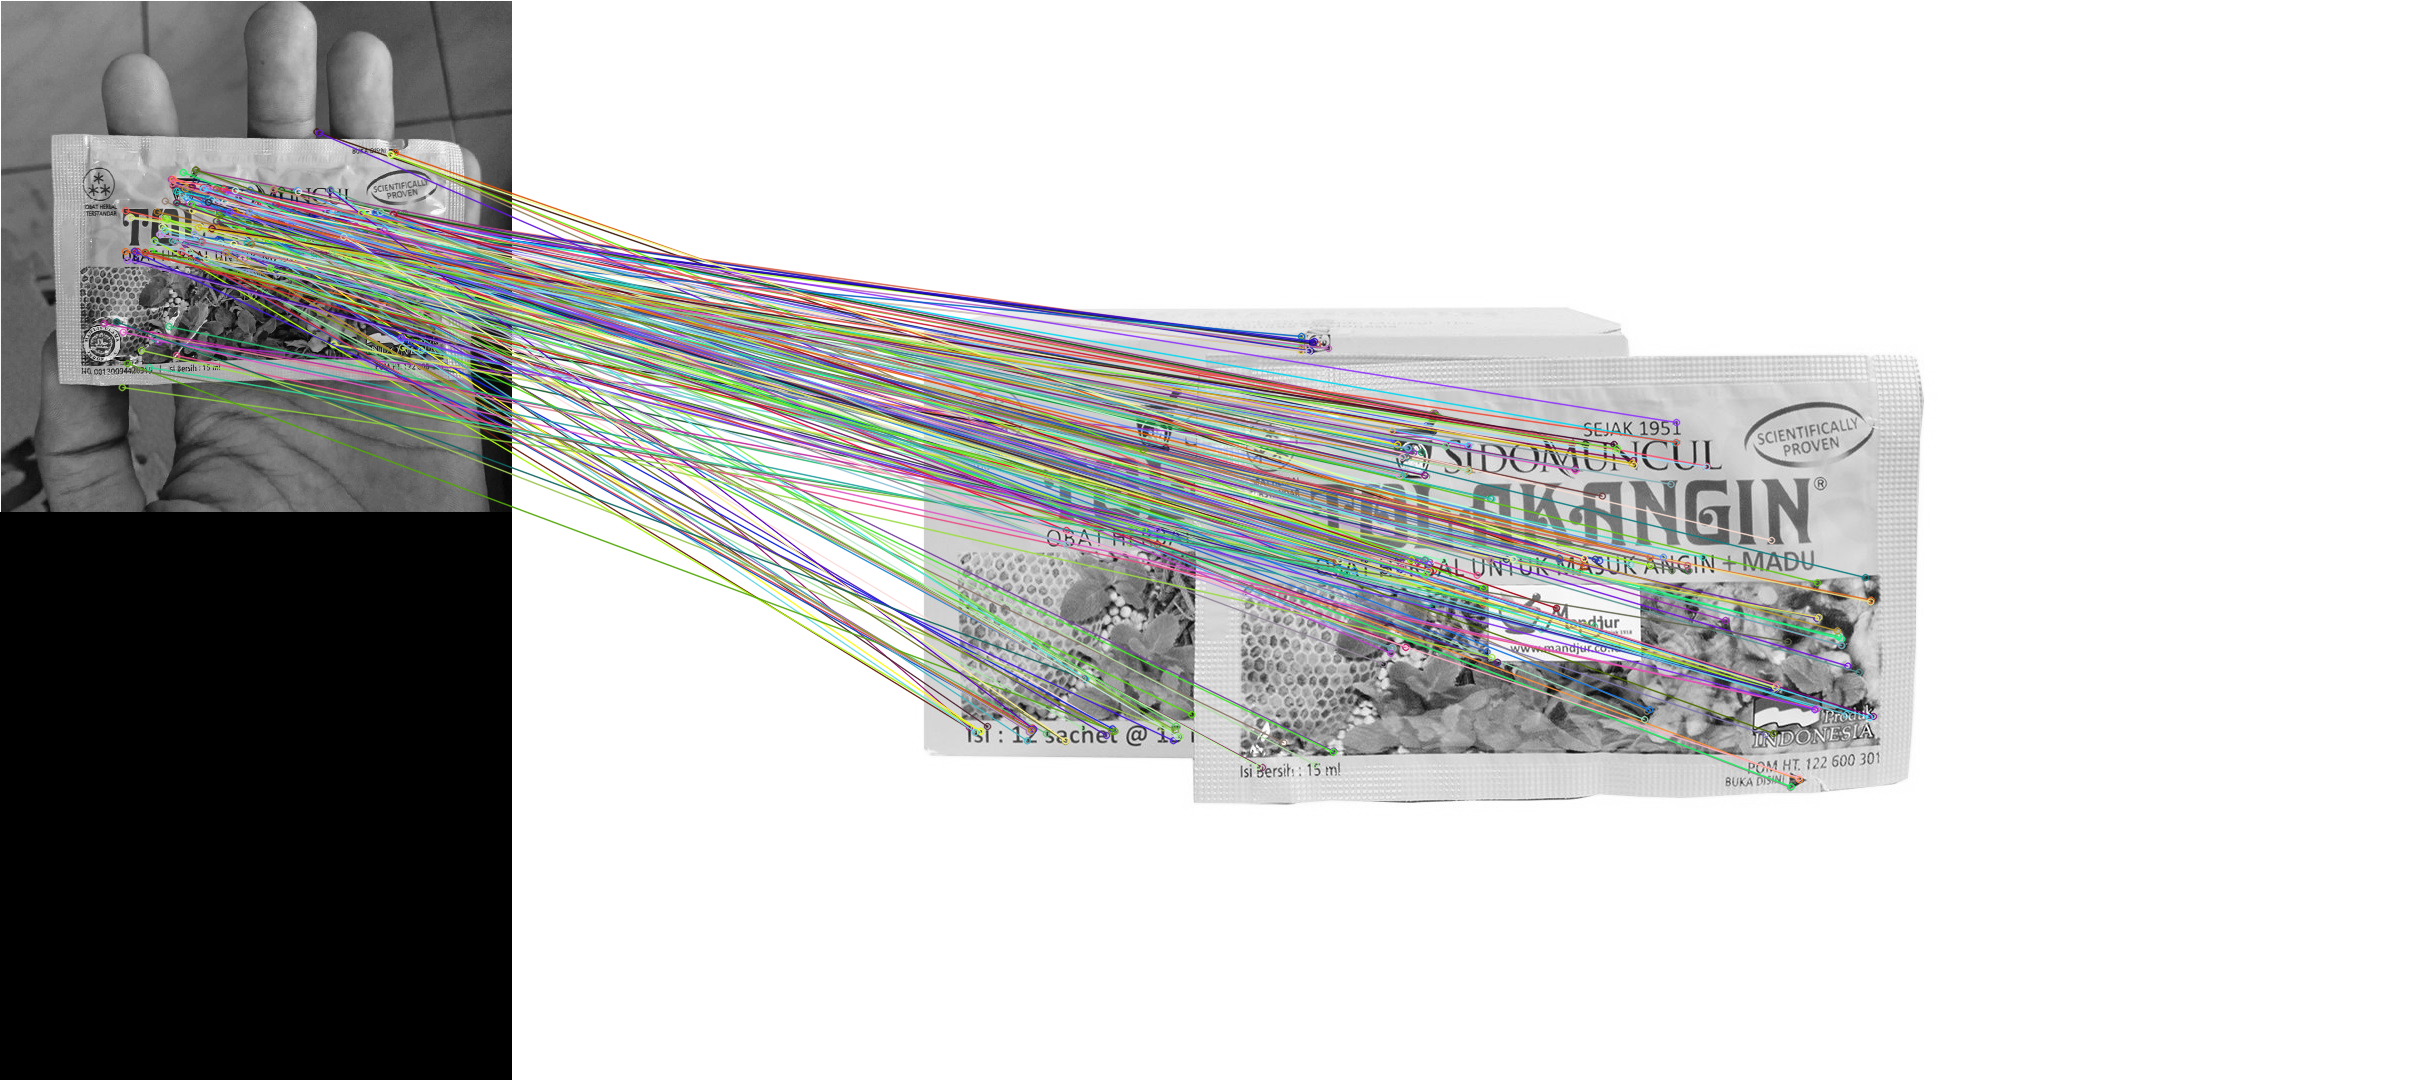

In [20]:
# printing total number of feature matches found
print(f'Total Number of Features matches found are {tot_feature_matches}')

# after drawing the feature matches displaying the output image
display_output(gray_pic1,key_pt1,gray_pic2,key_pt2,number_of_matches)